# General Relativity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import ipywidgets

def gamma(b):
    return 1/np.sqrt(1-b**2)

### Hw1.3

How does an isotropically emitting gamma source look like from the point of view of a moving observer?

In [2]:
def theta(theta_prime,beta):
    s = np.sin(theta_prime)/(gamma(beta)*(1 + np.cos(theta_prime)*beta))
    c = (np.cos(theta_prime) + beta)/(1 + np.cos(theta_prime)*beta)
    if s >= 0:
        return np.arccos(c)
    else:
        return 2*np.pi - np.arccos(c)

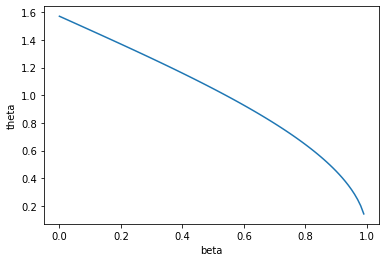

In [3]:
# varying beta

theta_prime = np.pi/2


betas = np.arange(0,1,0.01)

thetas = [theta(theta_prime=theta_prime,beta=b) for b in betas]
thetas = np.array(thetas)

plt.figure()
plt.plot(betas,thetas)
plt.xlabel('beta')
plt.ylabel('theta')
plt.show()


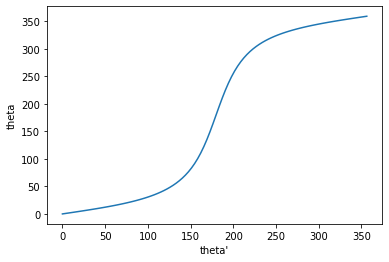

In [4]:
# varying theta_prime

beta = 0.9


theta_primes = np.arange(0,2*np.pi,2*np.pi/100)

thetas = [theta(theta_prime=t,beta=beta) for t in theta_primes]
thetas = np.array(thetas)

plt.figure()
plt.plot(theta_primes*180/np.pi,thetas*180/np.pi)
plt.xlabel('theta\'')
plt.ylabel('theta')
plt.show()

In [5]:
# multiple rays

n_rays = 16

theta_primes = np.arange(0,2*np.pi,2*np.pi/n_rays)

def plot_rays(beta):
    
    thetas = [theta(theta_prime=t,beta=beta) for t in theta_primes]
    thetas = np.array(thetas)

    plt.figure()
    for t in thetas:
        plt.plot([0,np.cos(t)],[0,np.sin(t)])
    plt.show()
    
ipywidgets.interact(plot_rays, beta = (0,0.99,0.01))

interactive(children=(FloatSlider(value=0.49, description='beta', max=0.99, step=0.01), Output()), _dom_classe…

<function __main__.plot_rays(beta)>

In [6]:
# Intensity

n_rays = 16
amp_factor = 1000

theta_primes = np.arange(0,np.pi,np.pi/(amp_factor*n_rays))
theta_scan = np.arange(0,np.pi+np.pi/n_rays,np.pi/n_rays)


def plot_intensity(beta):
    
    thetas = [theta(theta_prime=t,beta=beta) for t in theta_primes]
    thetas = np.array(thetas)
    
    intensity = np.zeros_like(theta_scan)
    
    j = 0
    last_i = 0
    for i,t in enumerate(thetas):
        if j >= len(intensity):
                print('error')
                break
        if t > theta_scan[j]:
            #print(i)
            intensity[j] = i - last_i
            last_i = i
            j += 1
    intensity[-1] = n_rays*amp_factor - last_i
    
    intensity /= 1.*n_rays*amp_factor

    plt.figure()
    plt.plot(theta_scan[1:]*180/np.pi,intensity[1:])
    plt.xlabel('theta')
    plt.ylabel('normalized intensity')
    plt.title('angular spectrum')
    plt.show()

#plot_intensity(0.3)
    
ipywidgets.interact(plot_intensity, beta = (0,0.99,0.01))

<function __main__.plot_intensity>

[2.16349540e+00 5.01905529e+02 7.57405795e+02 8.48150605e+02
 8.95935946e+02 9.27323719e+02 9.54009674e+02 9.74119200e+02
 9.93526279e+02 1.01292986e+03 1.03292835e+03 1.05880377e+03
 1.09221817e+03 1.13944806e+03 1.22886852e+03 1.48241102e+03
 9.77722079e+05] 992624.2264881638


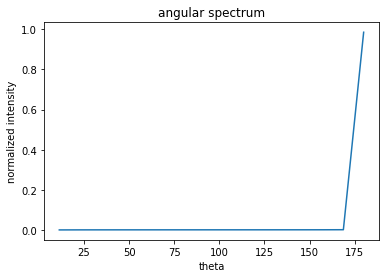

In [17]:
# accounting for 3-dimensionality

n_rays = 16
amp_factor = 1000

theta_primes = np.arange(0,np.pi,np.pi/(amp_factor*n_rays))
theta_scan = np.arange(0,np.pi+np.pi/n_rays,np.pi/n_rays)


def plot_intensity(beta):
    
    thetas = [theta(theta_prime=t,beta=beta) for t in theta_primes]
    thetas = np.array(thetas)
    
    intensity = np.zeros_like(theta_scan)
    
    j = 0
    for i,t in enumerate(thetas):
        if j >= len(intensity):
                print('error')
                break
        intensity[j] += (0.00001 + np.sin(theta_primes[i]))/(0.0001 + np.sin(theta_scan[j]))
        if t > theta_scan[j]:
            #print(i)
            j += 1
    
    s = sum(intensity)
    print(intensity,s)
    intensity /= 1.*s

    plt.figure()
    plt.plot(theta_scan[1:]*180/np.pi,intensity[1:])
    plt.xlabel('theta')
    plt.ylabel('normalized intensity')
    plt.title('angular spectrum')
    plt.show()

plot_intensity(0.)
    
#ipywidgets.interact(plot_intensity, beta = (0,0.99,0.01))

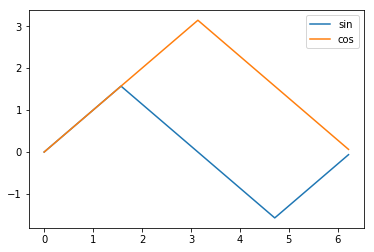

In [45]:
# just to clarify how (arc)cos and (arc)sin work

theta_primes = np.arange(0,2*np.pi,2*np.pi/100)

plt.figure()
plt.plot(theta_primes,np.arcsin(np.sin(theta_primes)), label = 'sin')
plt.plot(theta_primes,np.arccos(np.cos(theta_primes)), label = 'cos')
plt.legend()
plt.show()
